In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import semopy as sem
from semopy import Model
from semopy.examples import univariate_regression as uregr

In [9]:
descr = sem.examples.political_democracy.get_model()
print(descr)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [10]:
data = sem.examples.political_democracy.get_data()
data.head()

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679


In [11]:
mod = sem.Model(descr)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


In [12]:
mod.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482379,0.399024,3.715017,0.000203
1,dem65,~,ind60,0.571912,0.221383,2.583364,0.009784
2,dem65,~,dem60,0.837574,0.098446,8.507992,0.0
3,x1,~,ind60,1.000000,-,-,-
4,x2,~,ind60,2.180494,0.138565,15.736254,0.0
5,x3,~,ind60,1.818546,0.151993,11.96465,0.0
6,y1,~,dem60,1.000000,-,-,-
7,y2,~,dem60,1.256819,0.182687,6.879647,0.0
8,y3,~,dem60,1.058174,0.151521,6.983699,0.0
9,y4,~,dem60,1.265186,0.145151,8.716344,0.0


In [16]:
descr = uregr.get_model()
data = uregr.get_data()
descr

'y ~ x'

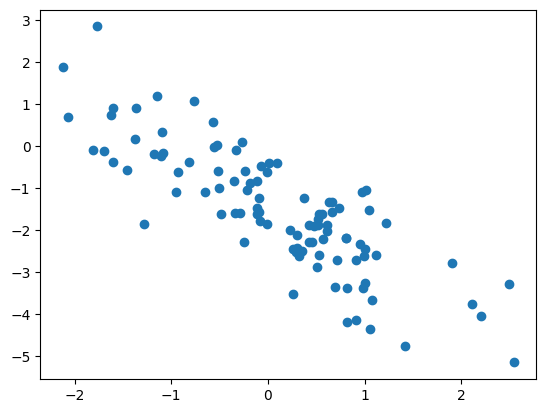

In [21]:
plt.scatter(data.x, data.y);

In [19]:
mod = Model('y ~ x')
res_opt = mod.fit(data)
estimates = mod.inspect()
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 11
Params: -1.221 0.670


In [22]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y,~,x,-1.221069,0.083165,-14.682538,0.000000e+00
1,y,~~,y,0.670367,0.094804,7.071068,1.537437e-12
